In [12]:
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import cv2
import seaborn as sns; sns.set()
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
x_train  = x_train/255
x_test  = x_test/255

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [17]:
one_hot_encoder.fit(y_train)

OneHotEncoder(sparse=False)

In [18]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [19]:
num_classes = 10

In [20]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:],name='conv1'))
model.add(BatchNormalization(axis=3, name='bn_conv1'))
model.add(Activation('elu'))
model.add(Conv2D(64, (3, 3), padding='same',name='conv2'))
model.add(BatchNormalization(axis=3, name='bn_conv2'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',name='conv3'))
model.add(BatchNormalization(axis=3, name='bn_conv3'))
model.add(Activation('elu'))
model.add(Conv2D(128, (3, 3), padding='same',name='conv4'))
model.add(BatchNormalization(axis=3, name='bn_conv4'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Conv2D(256, (3, 3), padding='same',name='conv5'))
model.add(BatchNormalization(axis=3, name='bn_conv5'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv6'))
model.add(BatchNormalization(axis=3, name='bn_conv6'))
model.add(Activation('elu'))
model.add(Conv2D(256, (3, 3), padding='same',name='conv7'))
model.add(BatchNormalization(axis=3, name='bn_conv7'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv8'))
model.add(BatchNormalization(axis=3, name='bn_conv8'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv9'))
model.add(BatchNormalization(axis=3, name='bn_conv9'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv10'))
model.add(BatchNormalization(axis=3, name='bn_conv10'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(Conv2D(512, (3, 3), padding='same',name='conv11'))
model.add(BatchNormalization(axis=3, name='bn_conv11'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv12'))
model.add(BatchNormalization(axis=3, name='bn_conv12'))
model.add(Activation('elu'))
model.add(Conv2D(512, (3, 3), padding='same',name='conv13'))
model.add(BatchNormalization(axis=3, name='bn_conv13'))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


model.add(Flatten())
model.add(Dense(512,name='fc1'))
model.add(Activation('elu'))
model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adamax',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 64)        1792      
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_15 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 32, 32, 64)       256       
 n)                                                              
                                                                 
 activation_16 (Activation)  (None, 32, 32, 64)       

In [21]:
batch_size = 32
epochs = 40
model_history = model.fit(x_train, y_train, batch_size=batch_size,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/40
1562/1562 [==============================] - 38s 23ms/step - loss: 1.3319 - accuracy: 0.5257 - val_loss: 1.3628 - val_accuracy: 0.5567
Epoch 2/40
1562/1562 [==============================] - 35s 23ms/step - loss: 0.9077 - accuracy: 0.6872 - val_loss: 0.8075 - val_accuracy: 0.7262
Epoch 3/40
1562/1562 [==============================] - 35s 23ms/step - loss: 0.7311 - accuracy: 0.7514 - val_loss: 0.8209 - val_accuracy: 0.7334
Epoch 4/40
1562/1562 [==============================] - 35s 23ms/step - loss: 0.6065 - accuracy: 0.7949 - val_loss: 0.7480 - val_accuracy: 0.7589
Epoch 5/40
1562/1562 [==============================] - 35s 23ms/step - loss: 0.5062 - accuracy: 0.8268 - val_loss: 0.6288 - val_accuracy: 0.7922
Epoch 6/40
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4270 - accuracy: 0.8528 - val_loss: 0.6514 - val_accuracy: 0.7910
Epoch 7/40
1562/1562 [==============================] - 35s 23ms/step - loss: 0.3560 - accuracy: 0.8784 - val_loss: 0.6151 -

In [22]:
model.save('VGG16-0.h5')

In [23]:
from keras import models
model = models.load_model('VGG16-0.h5')

In [24]:
loss, accuracy = model.evaluate(x_train,y_train)
print("Trainging Accuracy = %.2f  %%   loss = %f" % (accuracy * 100, loss))
loss, accuracy = model.evaluate(x_test,y_test)
print("Testing Accuracy = %.2f %%   loss = %f " % (accuracy* 100 , loss))

1563/1563 [==============================] - 14s 9ms/step - loss: 0.0070 - accuracy: 0.9977
Trainging Accuracy = 99.77  %   loss = 0.007005
313/313 [==============================] - 3s 9ms/step - loss: 0.9484 - accuracy: 0.8384
Testing Accuracy = 83.84 %   loss = 0.948440 


In [25]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

In [26]:
cm = confusion_matrix(y_test, predictions)

In [27]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

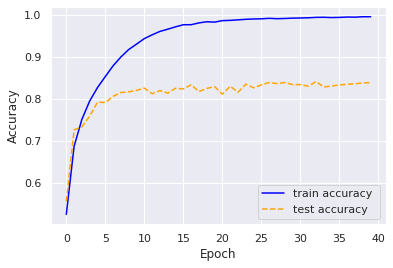

In [28]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['accuracy'],
         label='train accuracy ',
         c='blue', ls='-')
plt.plot(model_history.history['val_accuracy'],
         label='test accuracy ',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

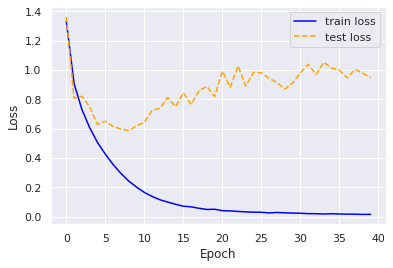

In [29]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.plot(model_history.history['loss'],
         label='train loss',
         c='blue', ls='-')
plt.plot(model_history.history['val_loss'],
         label='test loss',
         c='orange',ls='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

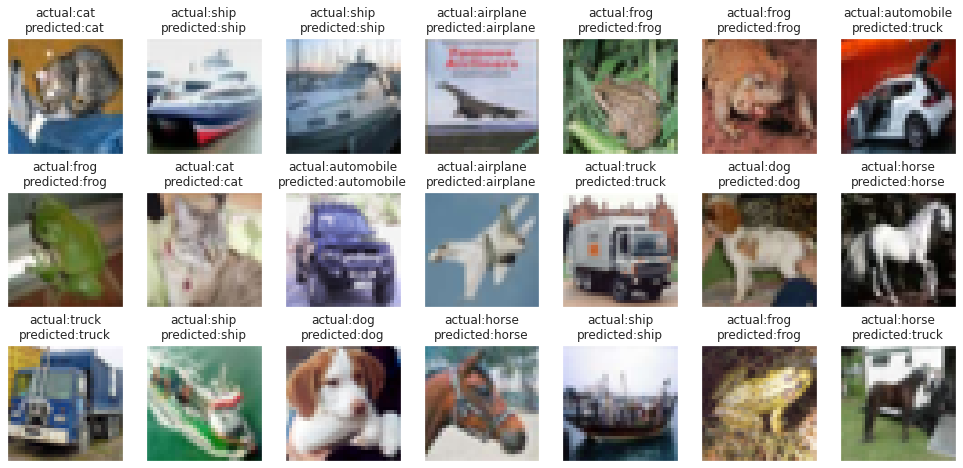

In [30]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

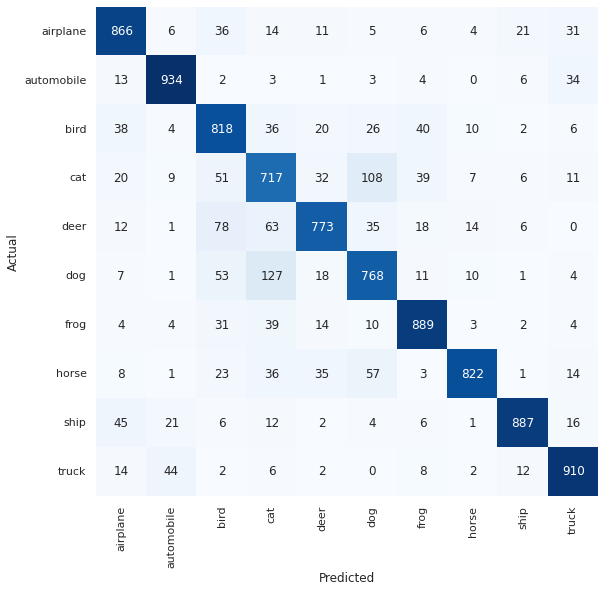

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes,fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()